In [1]:
#Population models for Syria

%matplotlib inline

from modsim import *



In [2]:
from pandas import read_csv

In [22]:
import csv

filename = 'C:/Users/epan/Desktop/popdata1.csv'
tables = read_csv(filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
#tables.columns = ['pop']
pop = tables.Population
#pop = TimeSeries()
#pop[1960]=tables.Population[1960]
#for t in linrange(1960, 2015):
  #      pop[t+1] = tables.Population[t+1]
tables

,Population
Year,
1960,4573512
1961,4721896
1962,4875422
1963,5034646
1964,5200336
1965,5373137
1966,5553246
1967,5740710
1968,5935860


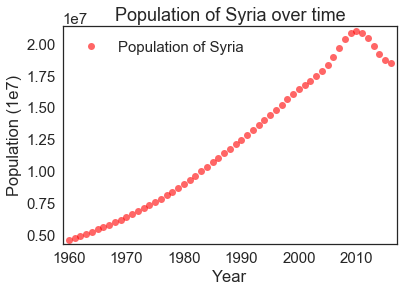

In [4]:
plot(tables, 'ro', label = 'Population of Syria') 
decorate(xlabel='Year', ylabel='Population (1e7)', title='Population of Syria over time', autoscaley_on=False)
    

In [14]:
birth_filename = 'C:/Users/epan/Desktop/birthrates1.csv'
birth_table = read_csv(birth_filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
birthrate = birth_table.SYR/1000
birth_table

0.048441000000000005

In [47]:
death_filename = 'C:/Users/epan/Desktop/deathrates1.csv'
death_table = read_csv(death_filename, header = 1, index_col=0, usecols=[0, 226], skiprows=[2,3])
deathrate = death_table.SYR/1000
death_table

,SYR
Country Code,
1960,16.102
1961,15.583
1962,15.063
1963,14.543
1964,14.025
1965,13.509
1966,12.994
1967,12.481
1968,11.970


In [40]:
system = System(t0=1960, t_end=2015, p0=4573512, birthrate = birthrate, deathrate = deathrate)

def run_simulation(system):
    model = TimeSeries()
    model[1960]=4573512
    
    for t in range(system.t0, system.t_end):
        rate_birth = system.birthrate[t]
        births = model[t]*rate_birth
        deaths = model[t]*system.deathrate[t]
        model[t+1] = model[t] + births - deaths
    system.model = model
    return model

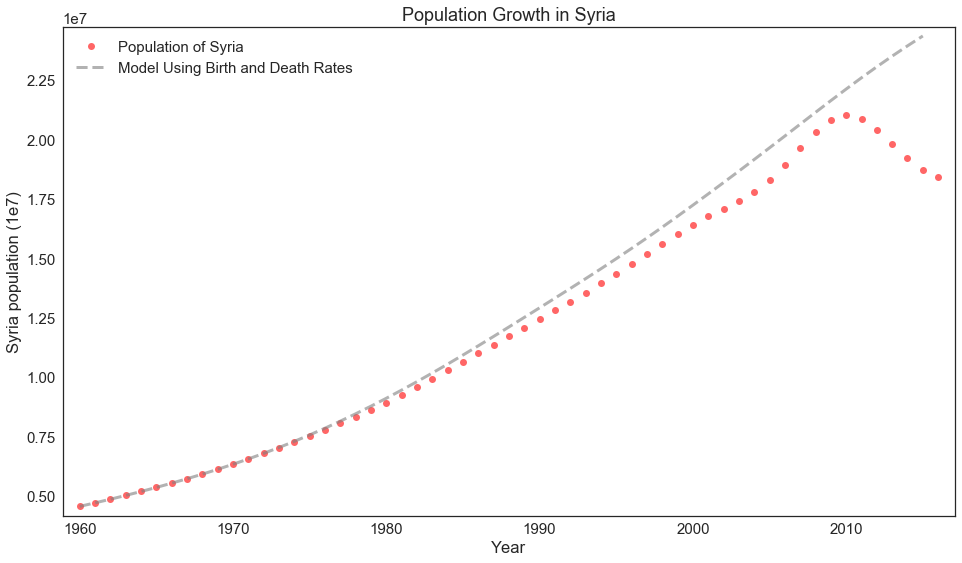

In [54]:
simulation = run_simulation(system)
newfig()
plot(tables, 'ro', label = 'Population of Syria') 
plot(simulation, '--', color='gray', label='Model Using Birth and Death Rates')
decorate(xlabel='Year', ylabel='Syria population (1e7)', title='Population Growth in Syria', )
plt.rcParams["figure.figsize"] = [16,9]


In [10]:
pop

<bound method NDFrame.pop of            pop
Year          
1960   4573512
1961   4721896
1962   4875422
1963   5034646
1964   5200336
1965   5373137
1966   5553246
1967   5740710
1968   5935860
1969   6139048
1970   6350541
1971   6570857
1972   6800141
1973   7037851
1974   7283177
1975   7535714
1976   7794662
1977   8060649
1978   8336418
1979   8625690
1980   8930774
1981   9252851
1982   9590227
1983   9938847
1984  10293049
1985  10648632
1986  11004272
1987  11360852
1988  11719071
1989  12080444
1990  12446171
1991  12815219
1992  13187085
1993  13564167
1994  13949697
1995  14345492
1996  14755286
1997  15177456
1998  15602210
1999  16016092
2000  16410848
2001  16766899
2002  17087901
2003  17415266
2004  17806638
2005  18294611
2006  18914977
2007  19632806
2008  20325443
2009  20824893
2010  21018834
2011  20863993
2012  20420701
2013  19809141
2014  19203090
2015  18734987
2016  18430453>